In [37]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from IPython.display import Image

In [2]:
!ls

Otus_method.ipynb         images                    kmeans_segmentation.ipynb


In [32]:
class k_means:
    def __init__(self):
        original_image = cv2.imread("images/island.jpeg")
        self.img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
        self.vectorized = self.img.reshape((-1,3))
        self.vectorized = np.float32(self.vectorized)

    
    def process(self, K):
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        attempts = 10 
        ret,label,center = cv2.kmeans(self.vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

        center = np.uint8(center)
        res = center[label.flatten()]
        self.result_image = res.reshape((self.img.shape))
              
        figure_size = 15
        plt.figure(figsize=(figure_size,figure_size))
        plt.subplot(1,2,1),plt.imshow(self.img)
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(self.result_image)
        plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
        plt.show()


## Note

1. the image array should be of float32 data type
2. K denotes the number of clusters 
3. Criteria to stop iteration and there are three flags 
   - cv2.TERM_CRITERIA_EPS: epsilon for accuracy
   - cv2.TERM_CRITERIA_MAX_ITER: prescribes the number of iterations 
   - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER: iteration stops when any of these two is met. 
  
  
4. attempts: specifies the numbers of runs of algorithms with different initial labelings, which will return the labels that yields the best compactness. 
5. flags: specifies how the initial centers are chosen, there are two options: cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS

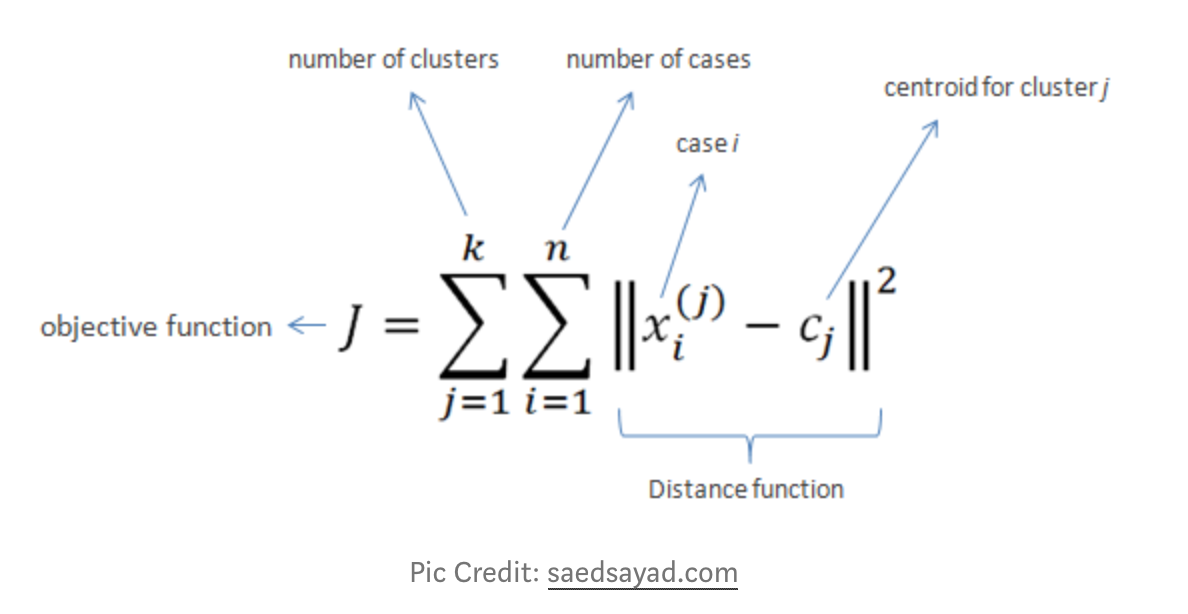

In [40]:
display(Image(filename='/Users/gmnam/myGit/notRepos/ImageProcessing/ImageSegmentation/images/k_means_objFunc.png', width=600))

In [33]:
a = k_means()

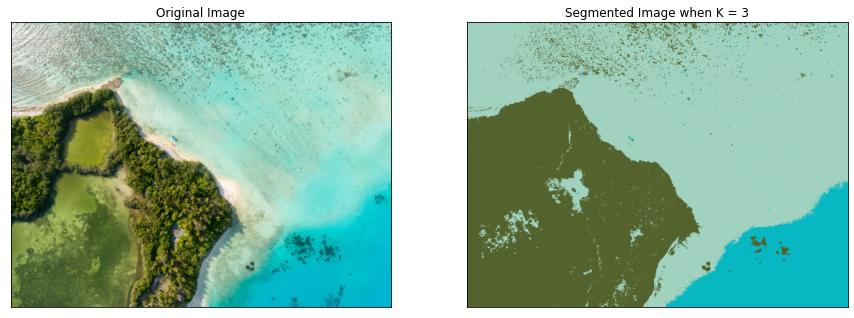

In [34]:
a.process(3)

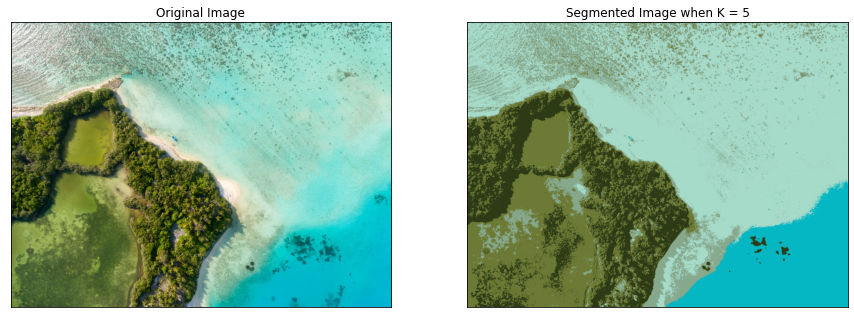

In [35]:
a.process(5)

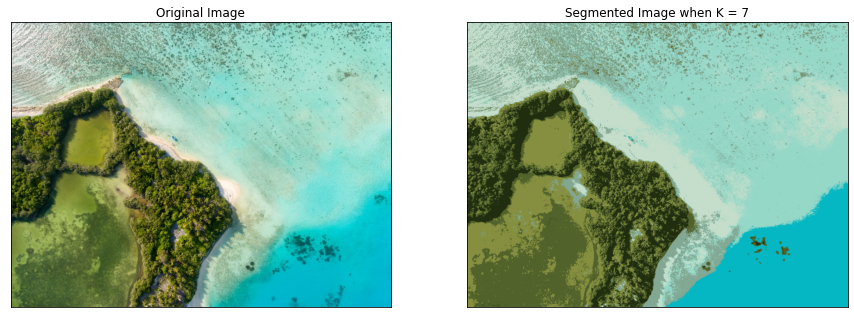

In [36]:
a.process(7)

## References 

1. [Introduction to Image segmentation with K-Means clustering in OpenCV](https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3)

2. [k-means++ for choosing initial centers (Wiki)](https://en.wikipedia.org/wiki/K-means%2B%2B)


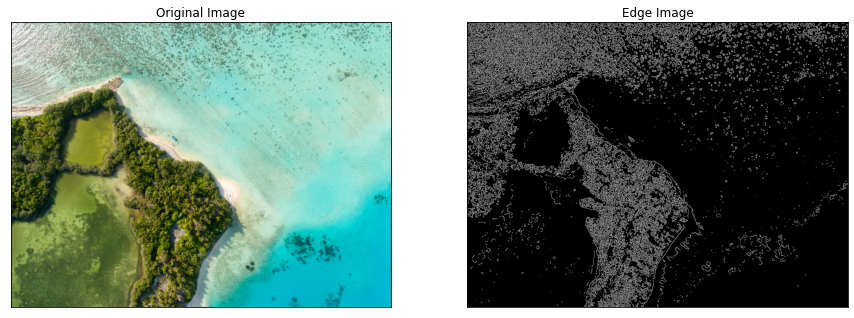

In [41]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()